In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xesmf as xe
import xarray as xr
base_dir = f'/mnt/lustre/koa/class/atmo449_class/students/team_1_flood_risk/'

<xarray.Dataset> Size: 45MB
Dimensions:  (time: 2928, lat: 80, lon: 48)
Coordinates:
  * lon      (lon) float64 384B 189.1 189.7 190.3 190.9 ... 217.2 217.8 218.4
  * lat      (lat) float64 640B -4.75 -4.25 -3.75 -3.25 ... 33.75 34.25 34.75
  * time     (time) datetime64[ns] 23kB 2000-01-01 ... 2000-12-31T21:00:00
Data variables:
    tp       (time, lat, lon) float32 45MB nan nan nan ... 0.0006876 0.0007361
Attributes:
    regrid_method:  conservative

In [ ]:
df_station_data = pd.read_csv(f"{base_dir}/raw_data/station_metadata.csv")
df_station_data['island'] = df_station_data['island'].str.strip()

available_station_ids = [int(i.split('.')[0]) for i in os.listdir(f"{base_dir}/preprocessed_data/selected_flowgauge_15mins")]

In [ ]:
df_oahu_stations = df_station_data[df_station_data['station_id'].isin(available_station_ids)].query('island == "Oahu"')
station_id = 16240500# manoa

In [95]:
df_obs = pd.read_csv(f"{base_dir}/preprocessed_data/selected_flowgauge_15mins/{station_id}.csv")
df_obs['hst_timestamp'] = pd.to_datetime(df_obs['hst_timestamp'])
df_obs = df_obs.set_index('hst_timestamp', drop=True)

In [96]:
df_obs_hourly_means_all = df_obs.resample('h').mean()
df_obs_hourly_means = df_obs_hourly_means_all[(df_obs.groupby(pd.Grouper(freq='h')).size() == 4)]

In [130]:
df = pd.read_csv(f'{base_dir}/raw_data/gauge_observations/16240500.csv')
df_flooded = df[df['measurement'] > 4].copy()
df_flooded['hst_timestamp'] = pd.to_datetime(df_flooded['hst_timestamp'])

In [137]:
ground_truth = set(df_flooded['hst_timestamp'].dt.floor('h').unique())

In [146]:
threshold = 3.15
threshold_exceeded = set(df_obs_hourly_means.query(f'measurement > {threshold}').index)

In [165]:
df_3hourly = df_obs_hourly_means.resample('3h', closed='left').max()
df_3hourly.to_csv(f"{base_dir}/preprocessed_data/selected_flowgauge_3hourly/{station_id}.csv")

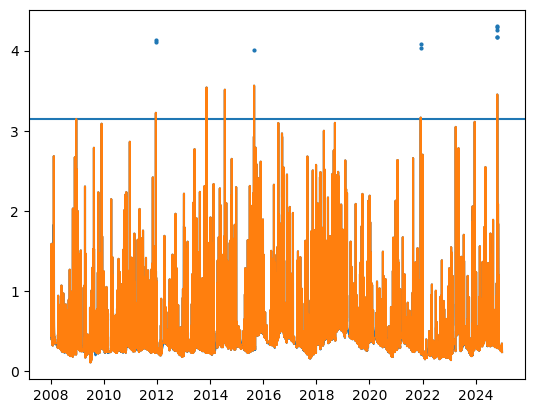

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(df_obs_hourly_means['measurement'])
ax.scatter(df_flooded['hst_timestamp'], df_flooded['measurement'], s=4)
ax.axhline(3.15)
ax.plot(df_obs_hourly_means.resample('3h').max())